In [1]:
# 데이터
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import glob
import matplotlib.pyplot as plt
import numpy as np
import re

# 학습
import torch.nn as nn
from torch.optim import Adam
from torchvision import models
import tqdm

# 시각화
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,confusion_matrix
# import seaborn as sns

# 추론
from PIL import Image
import cv2

In [2]:
img = Image.open("C:/Project3/server/massage1_1000.1327201274989.jpg")
img.size

(1280, 720)

In [3]:
max_size = max(img.size)
max_size

1280

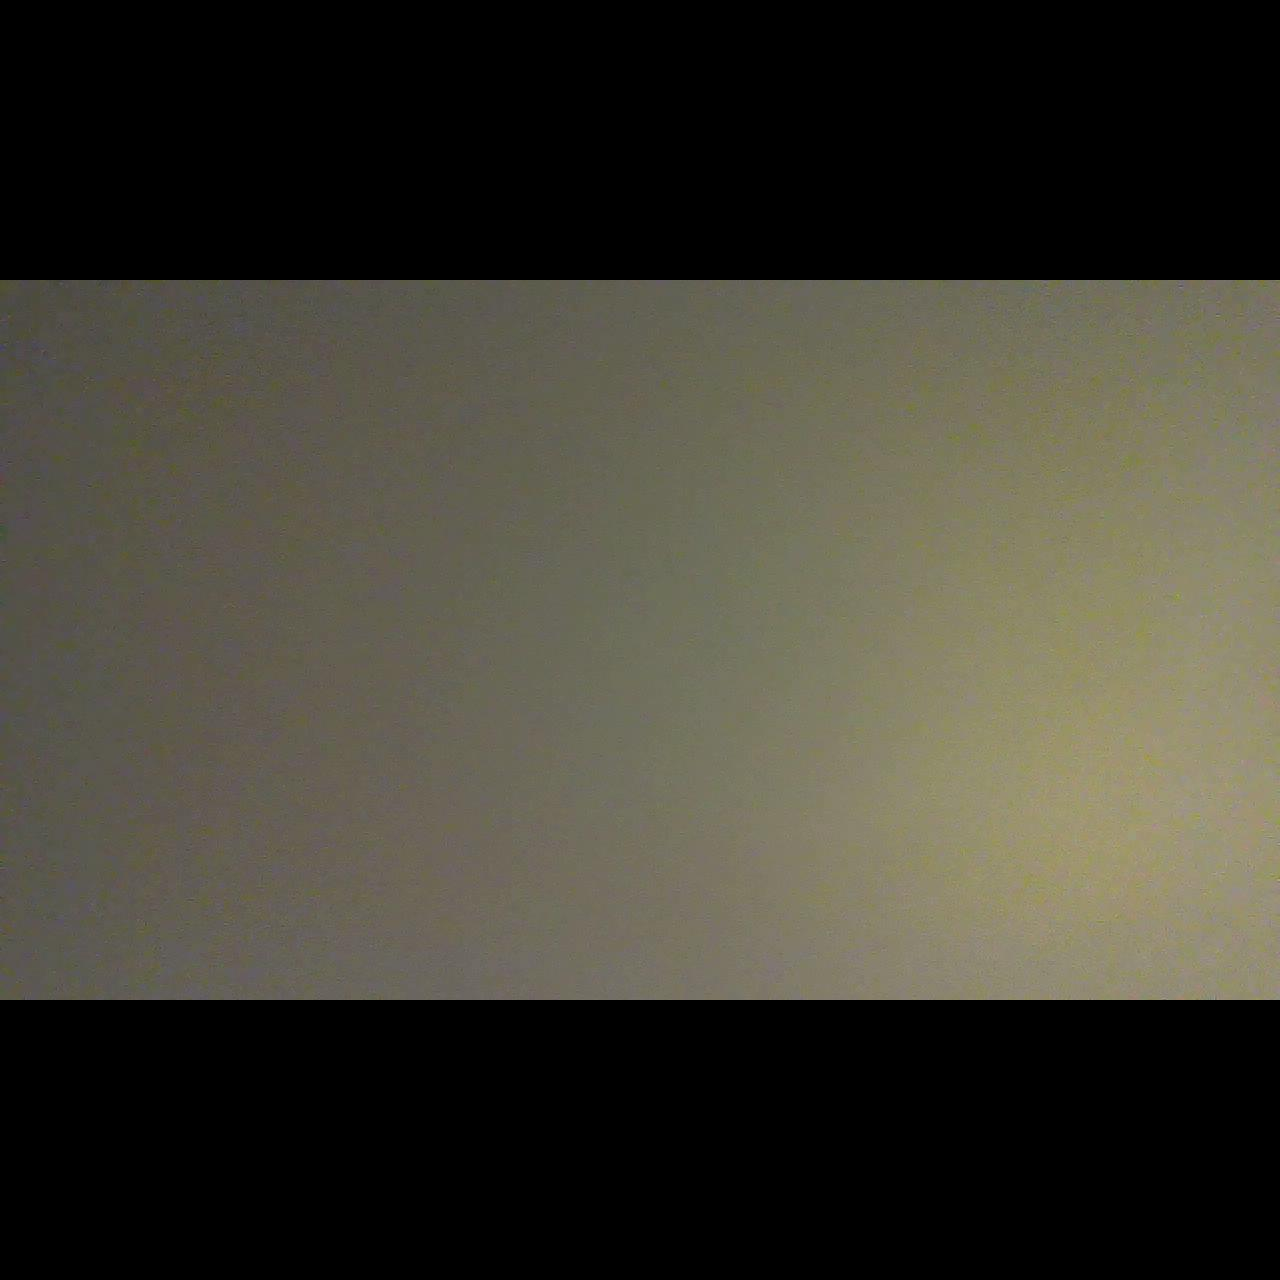

In [4]:
resized_img = Image.new(mode='RGB', size = (max_size, max_size), color = (0,0,0))
offset = (round((abs(img.size[0] - max_size)) / 2), round((abs(img.size[1] - max_size)) / 2))
resized_img.paste(img, offset)
resized_img

In [21]:
a =r'C:/mtoc/tether/down/247.jpg'

print(re.search(r'.+down', a).group())
print(re.search(r'[0-9]+?\.jpg', a).group())

C:/mtoc/tether/down
247.jpg


In [27]:
def img_resize(img_path):
    new_file_path = re.search(r'.+down', rf'{img_path}').group() + '_resize/' + re.search(r'[0-9]+?\.jpg', img_path).group()
    print(new_file_path)
    img = Image.open(img_path)
    max_size = max(img.size) # 큰 사이즈에 맞춘다
    resized_img = Image.new(mode='RGB', size = (max_size, max_size), color = (0,0,0))
    offset = (round((abs(img.size[0] - max_size)) / 2), round((abs(img.size[1] - max_size)) / 2))
    resized_img.paste(img, offset)
    resized_img.save(new_file_path)

In [29]:
img_resize(a)

C:/mtoc/tether/down_resize/247.jpg


In [31]:
for path in glob.glob('C:/mtoc/tether/down/*.*'):
    img_resize(path)
    print('저장')

C:/mtoc/tether/down_resize/0.jpg
저장
C:/mtoc/tether/down_resize/1.jpg
저장
C:/mtoc/tether/down_resize/10.jpg
저장
C:/mtoc/tether/down_resize/100.jpg
저장
C:/mtoc/tether/down_resize/101.jpg
저장
C:/mtoc/tether/down_resize/102.jpg
저장
C:/mtoc/tether/down_resize/103.jpg
저장
C:/mtoc/tether/down_resize/104.jpg
저장
C:/mtoc/tether/down_resize/105.jpg
저장
C:/mtoc/tether/down_resize/106.jpg
저장
C:/mtoc/tether/down_resize/107.jpg
저장
C:/mtoc/tether/down_resize/108.jpg
저장
C:/mtoc/tether/down_resize/109.jpg
저장
C:/mtoc/tether/down_resize/11.jpg
저장
C:/mtoc/tether/down_resize/110.jpg
저장
C:/mtoc/tether/down_resize/111.jpg
저장
C:/mtoc/tether/down_resize/112.jpg
저장
C:/mtoc/tether/down_resize/113.jpg
저장
C:/mtoc/tether/down_resize/114.jpg
저장
C:/mtoc/tether/down_resize/115.jpg
저장
C:/mtoc/tether/down_resize/116.jpg
저장
C:/mtoc/tether/down_resize/117.jpg
저장
C:/mtoc/tether/down_resize/118.jpg
저장
C:/mtoc/tether/down_resize/119.jpg
저장
C:/mtoc/tether/down_resize/12.jpg
저장
C:/mtoc/tether/down_resize/120.jpg
저장
C:/mtoc/tether/down

In [32]:
len(glob.glob('C:/mtoc/tether/down/*.*')), len(glob.glob('C:/mtoc/tether/down_resize/*.*'))

(261, 261)

In [33]:
class UpDownData(Dataset):
    def __init__(self, path, train=True, transforms=None):
        self.path = path
        self.transforms = transforms
        
        self.up_list = glob.glob(self.path+ '/left_up_resize/*.*') + glob.glob(self.path+'/right_up_resize/*.*')
        self.down_list = glob.glob(self.path+'/down_resize/*.*')
        
        if train == True:
            self.data_list = self.up_list[:int(len(self.up_list)*0.7)] + self.down_list[:int(len(self.down_list)*0.7)]
            self.label_list = [0] * int(len(self.up_list)*0.7) + [1] * int(len(self.down_list)*0.7)
        else:
            self.data_list = self.up_list[int(len(self.up_list)*0.7):] + self.down_list[int(len(self.down_list)*0.7):]
            self.label_list = [0] * len(self.up_list[int(len(self.up_list)*0.7):]) + [1] * len(self.down_list[int(len(self.down_list)*0.7):])
        
    def __len__(self):
        return len(self.data_list)
    
    def __getitem__(self, idx):
        img_path = self.data_list[idx]
        img_label = self.label_list[idx]
        img = Image.open(img_path)
        
        if self.transforms is not None:
            img = self.transforms(img)
        return img, img_label

In [34]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # 이미지를 그레이스케일로 변환
    transforms.Resize((224, 224)),  # CNN에 넣기 위한 이미지 크기 조정
    transforms.ToTensor(),  # 텐서로 변환 (H, W, C -> C, H, W)
])

train_data = UpDownData("C:/mtoc/tether", train=True, transforms=transform)
test_data = UpDownData("C:/mtoc/tether", train=False, transforms=transform)

In [35]:
train_data.data_list

['C:/mtoc/tether/left_up_resize\\1.jpg',
 'C:/mtoc/tether/left_up_resize\\10.jpg',
 'C:/mtoc/tether/left_up_resize\\100.jpg',
 'C:/mtoc/tether/left_up_resize\\101.jpg',
 'C:/mtoc/tether/left_up_resize\\102.jpg',
 'C:/mtoc/tether/left_up_resize\\103.jpg',
 'C:/mtoc/tether/left_up_resize\\104.jpg',
 'C:/mtoc/tether/left_up_resize\\105.jpg',
 'C:/mtoc/tether/left_up_resize\\106.jpg',
 'C:/mtoc/tether/left_up_resize\\107.jpg',
 'C:/mtoc/tether/left_up_resize\\108.jpg',
 'C:/mtoc/tether/left_up_resize\\109.jpg',
 'C:/mtoc/tether/left_up_resize\\11.jpg',
 'C:/mtoc/tether/left_up_resize\\110.jpg',
 'C:/mtoc/tether/left_up_resize\\111.jpg',
 'C:/mtoc/tether/left_up_resize\\112.jpg',
 'C:/mtoc/tether/left_up_resize\\113.jpg',
 'C:/mtoc/tether/left_up_resize\\114.jpg',
 'C:/mtoc/tether/left_up_resize\\115.jpg',
 'C:/mtoc/tether/left_up_resize\\116.jpg',
 'C:/mtoc/tether/left_up_resize\\117.jpg',
 'C:/mtoc/tether/left_up_resize\\118.jpg',
 'C:/mtoc/tether/left_up_resize\\119.jpg',
 'C:/mtoc/tethe

In [36]:
# Dataloader로 바꾸기
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

In [55]:
data, target = next(iter(train_loader))
print(data.shape, target.shape)

torch.Size([32, 1, 224, 224]) torch.Size([32])


Text(0.5, 1.0, 'tensor(0)')

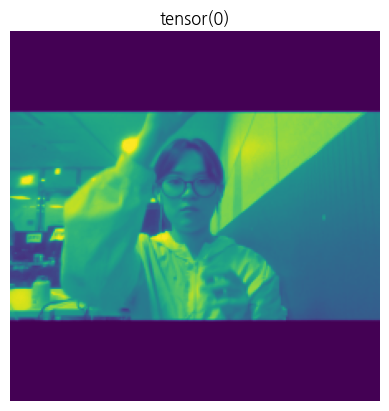

In [56]:
# up 0 down 1
plt.imshow(data[0].numpy().transpose(1,2,0))
plt.axis(False)
plt.title(target[0])

# 모델

In [57]:
model = models.efficientnet_b0(pretrained=True)

c:\mtoc\mtoc\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\mtoc\mtoc\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [58]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [59]:
# 1차원으로
model.features[0][0] = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)

In [60]:
for name, module in model.named_parameters():
  print(name, module.requires_grad)

features.0.0.weight True
features.0.1.weight True
features.0.1.bias True
features.1.0.block.0.0.weight True
features.1.0.block.0.1.weight True
features.1.0.block.0.1.bias True
features.1.0.block.1.fc1.weight True
features.1.0.block.1.fc1.bias True
features.1.0.block.1.fc2.weight True
features.1.0.block.1.fc2.bias True
features.1.0.block.2.0.weight True
features.1.0.block.2.1.weight True
features.1.0.block.2.1.bias True
features.2.0.block.0.0.weight True
features.2.0.block.0.1.weight True
features.2.0.block.0.1.bias True
features.2.0.block.1.0.weight True
features.2.0.block.1.1.weight True
features.2.0.block.1.1.bias True
features.2.0.block.2.fc1.weight True
features.2.0.block.2.fc1.bias True
features.2.0.block.2.fc2.weight True
features.2.0.block.2.fc2.bias True
features.2.0.block.3.0.weight True
features.2.0.block.3.1.weight True
features.2.0.block.3.1.bias True
features.2.1.block.0.0.weight True
features.2.1.block.0.1.weight True
features.2.1.block.0.1.bias True
features.2.1.block.1.

In [61]:
# freeze
for param in model.parameters():
    param.requires_grad = False

In [62]:
fc = nn.Sequential(
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(model.classifier[1].in_features, 2),
)
model.classifier = fc
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [63]:
for name, module in model.named_parameters():
  print(name, module.requires_grad)

features.0.0.weight False
features.0.1.weight False
features.0.1.bias False
features.1.0.block.0.0.weight False
features.1.0.block.0.1.weight False
features.1.0.block.0.1.bias False
features.1.0.block.1.fc1.weight False
features.1.0.block.1.fc1.bias False
features.1.0.block.1.fc2.weight False
features.1.0.block.1.fc2.bias False
features.1.0.block.2.0.weight False
features.1.0.block.2.1.weight False
features.1.0.block.2.1.bias False
features.2.0.block.0.0.weight False
features.2.0.block.0.1.weight False
features.2.0.block.0.1.bias False
features.2.0.block.1.0.weight False
features.2.0.block.1.1.weight False
features.2.0.block.1.1.bias False
features.2.0.block.2.fc1.weight False
features.2.0.block.2.fc1.bias False
features.2.0.block.2.fc2.weight False
features.2.0.block.2.fc2.bias False
features.2.0.block.3.0.weight False
features.2.0.block.3.1.weight False
features.2.0.block.3.1.bias False
features.2.1.block.0.0.weight False
features.2.1.block.0.1.weight False
features.2.1.block.0.1.bia

In [64]:
# 되는 지 확인
model(torch.rand(32, 1, 224, 224))

tensor([[-0.1025,  0.1176],
        [ 0.0756,  0.1806],
        [-0.0889,  0.0689],
        [ 0.0499,  0.1245],
        [ 0.1140,  0.1573],
        [ 0.0673, -0.1930],
        [-0.2168, -0.0164],
        [-0.0422,  0.0463],
        [-0.2151,  0.0809],
        [ 0.2284,  0.1007],
        [-0.0955,  0.3267],
        [ 0.0667,  0.2762],
        [ 0.0183,  0.1125],
        [ 0.0514,  0.2902],
        [-0.1580,  0.4127],
        [-0.1397,  0.0988],
        [ 0.1800,  0.6454],
        [-0.1129,  0.1463],
        [ 0.3024,  0.0323],
        [ 0.0231,  0.0481],
        [ 0.3270,  0.1990],
        [-0.0707, -0.0788],
        [-0.2302,  0.0671],
        [-0.0470,  0.1764],
        [-0.0117,  0.3795],
        [-0.0834,  0.1662],
        [-0.0769,  0.0871],
        [-0.0118,  0.0634],
        [-0.2096,  0.1335],
        [-0.2582,  0.2738],
        [ 0.2208, -0.1180],
        [-0.1430,  0.2799]], grad_fn=<AddmmBackward0>)

In [65]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

# 학습

In [66]:
# 최적화 함수
optimizer = Adam(model.parameters(), lr=0.0001)

# 손실
criterion = nn.CrossEntropyLoss()

# 에폭
epochs = 20

best_loss = float('inf')

loss_list = []

min_loss = 100
for epoch in range(epochs):
    epoch_loss = 0
    cnt = 0
    for data, target in tqdm.tqdm(train_loader):
        cnt +=1
        optimizer.zero_grad()
        pred = model(data.to(device))
        loss = criterion(pred, target.to(device))
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()

    print(f'epoch: {epoch+1}, loss: {epoch_loss/cnt}')
    loss_list.append(epoch_loss)
    if epoch_loss < min_loss:
      min_loss = epoch_loss
      model_name = f'efficient_epoch{epoch+1}.pth'
      torch.save(model.state_dict(), model_name)

100%|██████████| 19/19 [00:06<00:00,  2.90it/s]


epoch: 1, loss: 0.6098200396487587


100%|██████████| 19/19 [00:06<00:00,  2.95it/s]


epoch: 2, loss: 0.4808559590264371


100%|██████████| 19/19 [00:06<00:00,  3.09it/s]


epoch: 3, loss: 0.39713626158864873


100%|██████████| 19/19 [00:06<00:00,  3.01it/s]


epoch: 4, loss: 0.3291794155773364


100%|██████████| 19/19 [00:06<00:00,  3.00it/s]


epoch: 5, loss: 0.2862908416672757


100%|██████████| 19/19 [00:06<00:00,  2.95it/s]


epoch: 6, loss: 0.24153267239269458


100%|██████████| 19/19 [00:06<00:00,  2.96it/s]


epoch: 7, loss: 0.21256892853661588


100%|██████████| 19/19 [00:06<00:00,  2.98it/s]


epoch: 8, loss: 0.18256280296727231


100%|██████████| 19/19 [00:06<00:00,  3.01it/s]


epoch: 9, loss: 0.16876080240073957


100%|██████████| 19/19 [00:06<00:00,  3.15it/s]


epoch: 10, loss: 0.15181946872096314


100%|██████████| 19/19 [00:06<00:00,  3.15it/s]


epoch: 11, loss: 0.13091529552873812


100%|██████████| 19/19 [00:06<00:00,  3.05it/s]


epoch: 12, loss: 0.12495385620154832


100%|██████████| 19/19 [00:06<00:00,  3.06it/s]


epoch: 13, loss: 0.11756709178811625


100%|██████████| 19/19 [00:05<00:00,  3.20it/s]


epoch: 14, loss: 0.11770889359085183


100%|██████████| 19/19 [00:06<00:00,  3.06it/s]


epoch: 15, loss: 0.09883280020011098


100%|██████████| 19/19 [00:06<00:00,  3.13it/s]


epoch: 16, loss: 0.08816492439884889


100%|██████████| 19/19 [00:05<00:00,  3.22it/s]


epoch: 17, loss: 0.08293048115937333


100%|██████████| 19/19 [00:06<00:00,  3.11it/s]


epoch: 18, loss: 0.07990811078956253


100%|██████████| 19/19 [00:06<00:00,  3.09it/s]


epoch: 19, loss: 0.08614446556097582


100%|██████████| 19/19 [00:05<00:00,  3.21it/s]

epoch: 20, loss: 0.09531984713516738


In [85]:
def imgshow(tensor_img1, title): # transform 된 [1, 224, 224] tesnor channel width height
  img = np.array(tensor_img1)
  img = img.transpose((1, 2, 0)) # matplotlib width, height, channel
  

  plt.imshow(img)
  plt.axis(False)
  plt.title(title)
  plt.show()

In [86]:
category = {0:'Up', 1:'Down'}

In [89]:
model.eval()
with torch.no_grad():
  corr = 0
  for data,target in (test_loader):
      pred = model(data.to(device))
      result = torch.max(pred,1)[1]
      # print(result, target)
      corr  +=torch.sum(result == target.to(device))
      # for idx, d in enumerate(data):
      #   imgshow(d, f'예측: {category[result[idx].item()]}, 정답: {category[target[idx].item()]}')

print(f'accuracy : {corr/len(test_data)}')

accuracy : 1.0


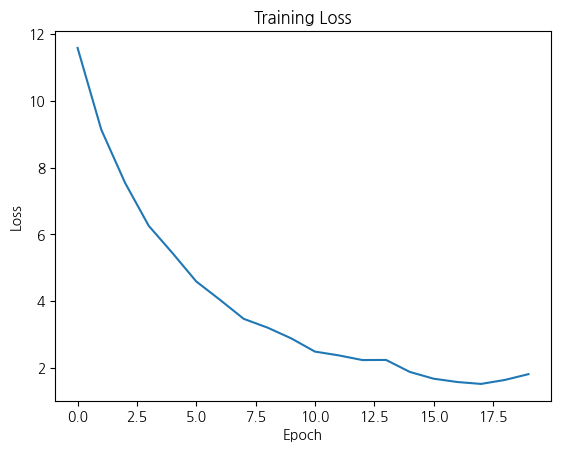

In [71]:
plt.plot(range(epochs), loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [72]:
presion, recall, f1, _ = precision_recall_fscore_support(result.to('cpu'), target,average='weighted')
print(f'presion: {presion}')
print(f'recall: {recall}')
print(f'f1-score: {f1}')

presion: 1.0
recall: 1.0
f1-score: 1.0


In [73]:
def inference_path(img_path):
    img = Image.open(img_path)
    
    max_size = max(img.size) # 큰 사이즈에 맞춘다
    resized_img = Image.new(mode='RGB', size = (max_size, max_size), color = (0,0,0))
    offset = (round((abs(img.size[0] - max_size)) / 2), round((abs(img.size[1] - max_size)) / 2))
    resized_img.paste(img, offset)
    
    img = transform(resized_img)
    img = img.unsqueeze(0)
    
    
    
    model.eval()
    with torch.no_grad():
      pred = model(img.to(device))
      # print(f'pred: {pred}')
      result = pred.max(dim=1)[1] # torch.max(pred, 1) 이렇게도 됨
      # print(f'result: {result.item()}')
      imgshow(img[0], f"결과: {category[result.item()]}")

In [78]:
def inference_path(img_path):
  
    img = Image.open(img_path)
    
    max_size = max(img.size) # 큰 사이즈에 맞춘다
    resized_img = Image.new(mode='RGB', size = (max_size, max_size), color = (0,0,0))
    offset = (round((abs(img.size[0] - max_size)) / 2), round((abs(img.size[1] - max_size)) / 2))
    resized_img.paste(img, offset)
    
    img = transform(resized_img)
    img = img.unsqueeze(0)
    
    
    model.eval()
    with torch.no_grad():
      pred = model(img.to(device))
      # print(f'pred: {pred}')
      result = pred.max(dim=1)[1] # torch.max(pred, 1) 이렇게도 됨
      # print(f'result: {result.item()}')
      print(f"결과: {category[result.item()]}")

In [88]:
cap = cv2.VideoCapture(0)
width = 1280
height = 720
cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)
while cap.isOpened():
    ret, frame = cap.read()
    
    frame= cv2.flip(frame, 1)
    
    if not ret:
        break
    
    cv2.imshow('', frame)
    
    if cv2.waitKey(1) == ord('q'):
        break
    if cv2.waitKey(1) == ord('1'):
        cv2.imwrite('here.jpg', frame)
        inference_path('here.jpg')
    
    
cap.release()
cv2.destroyAllWindows()

결과: Down
결과: Down
결과: Down
결과: Down
결과: Down
결과: Down
결과: Down
결과: Down
결과: Down
결과: Down
결과: Down
결과: Down
결과: Down
결과: Down
결과: Down
결과: Down
결과: Down
결과: Down
결과: Up
결과: Up
결과: Up
결과: Up
결과: Up
결과: Up
결과: Up
결과: Up
결과: Up
결과: Up
결과: Up
결과: Up
결과: Up
결과: Up
결과: Up
